<a href="https://colab.research.google.com/github/BrunoBustos96/DeteccionSomnolenciaCNN/blob/main/2_Desarrollo_del_modelo_Detecci%C3%B3nDeSomnoliencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detector de somnoliencia con Redes Neuronales Convolucionales CNNs**

Segunda parte de tres partes


## **Desarrolo del modelo CNN**

En esta parte del desarrollo del proyecto nos encargaremos de obtener un modelo con Redes Neuronales Convolucionales, teniendo en cuenta que este es un tipo de modelo que procesa sus capas imitando al cortex visual del ojo humano para identificar distintas características en las imágenes.

Por lo tanto, nuestro objetivo será encontrar el mejor modelo de acuerdo a las métricas encontradas. Posteriormente aplicaremos el modelo creado a la tercera parte del proyecto con la aplicación de la cámara.

### **1. Importamos las librerías**

In [ ]:
# Libreria que define tipos de datos representadas como matrices multidimensionales
import numpy as np
# Libreria especializada para la creacion de gráficos en dos dimensiones como ser diagramas de barras 
import matplotlib.pyplot as plt
# Biblioteca principal de código abierto para el desarrollo y entrenamiento de modelos de Apendizaje Automatizado 
import tensorflow as tf
# Libreria que permite incluir funciones para obtener distintos números aleatorios o pseudoaleatorios 
import random
# Marco de trabajo para desarrollo de aplicaciones de alto nivel de vision por computadora
import cv2
# OS nos permite usar funcionalidades dependientes del sistema operativo, lectura, escritura de archivos, manipulación de rutas
import os
# Importar la biblioteca Keras para el trabajo de DeepLearning que puede funcionar sobre TensorFlow
from tensorflow import keras
# train_test_split permite dividir datasets en bloques de entrenamiento y validación
# GridSearchCV permite la evaluación y selección de los parametros de un modelo para la evaliacion del rendimiento
from sklearn.model_selection import train_test_split, GridSearchCV# KerasClassifier permite la llamada de funciones para creación de modelos
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# Sequential agrupa pilas lineales de capas para un modelo de tf.Keras
from tensorflow.keras.models import Sequential
#Dense trabaja con una capa NN normal densamente conectada.
# Flatten sirve para aplanar entradas y mantener un mismo numero de lotes (batch)
# Conv2D es una capa de convolucion 2D como ser espacios convolucionales sobre las imagenes
# Capa que agrupa maximas entradas en 2D, por ejemplo en imagenes
# Dropout establece aleatoriamente las unidades de entrada en 0 cada paso durante el tiempo de entrenamiento, lo que ayuda a evitar el sobreajuste.
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
# Layers son bloques de básica construcción de NN en Keras, consistiendo en una funcion de cálculo de tensores
from tensorflow.keras import layers
# to_categorical convierte un vector de clase "entero" a una matriz de clase binaria
from tensorflow.keras.utils import to_categorical

# Se importa para usint %%timeit  
import time
##PIL permite la edicion de imagenes desde Python
#Image provee funciones para cargar imagenes desde archivos
#ImageDraw provee funcionalidades de graficos en 2D en objetos de Image, creando nuevas imagenes, retoque y anotación de imagenes 
from PIL import Image, ImageDraw

### **2. Importamos las imágenes**

Esta porción de código leerá y descomprimira los datos de entrenamiento (imagenes) y los redimensionará para trabajar con el paso del modelado


In [ ]:
#Nos conectamos a las carpetas de nuestro drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Creando el directorio data2, copiando la información del archivo zip
!mkdir data2
!cp /content/drive/MyDrive/DetectorSomnoliencia/Data/new_closed_eyesOr.zip data2
!cd data2 && unzip new_closed_eyesOr.zip

Streaming output truncated to the last 5000 lines.
  inflating: New_Closed_Eyes/eye_crop_closed649.jpg  
  inflating: __MACOSX/New_Closed_Eyes/._eye_crop_closed649.jpg  
  inflating: New_Closed_Eyes/eye_crop_closed1124.jpg  
  inflating: __MACOSX/New_Closed_Eyes/._eye_crop_closed1124.jpg  
  inflating: New_Closed_Eyes/s0015_00091_0_0_0_0_1_01.png  
  inflating: __MACOSX/New_Closed_Eyes/._s0015_00091_0_0_0_0_1_01.png  
  inflating: New_Closed_Eyes/eye_crop_closed1905.jpg  
  inflating: __MACOSX/New_Closed_Eyes/._eye_crop_closed1905.jpg  
  inflating: New_Closed_Eyes/eye_crop_closed1911.jpg  
  inflating: __MACOSX/New_Closed_Eyes/._eye_crop_closed1911.jpg  
  inflating: New_Closed_Eyes/s0016_01211_1_0_0_0_1_01.png  
  inflating: __MACOSX/New_Closed_Eyes/._s0016_01211_1_0_0_0_1_01.png  
  inflating: New_Closed_Eyes/eye_crop_closed932.jpg  
  inflating: __MACOSX/New_Closed_Eyes/._eye_crop_closed932.jpg  
  inflating: New_Closed_Eyes/eye_crop_closed1087.jpg  
  inflating: __MACOSX/New_Close

In [ ]:
# Creando el directorio data3, copiando la información la información del archivo zip
!mkdir data3
!cp /content/drive/MyDrive/DetectorSomnoliencia/Data/new_open_eyes10000.zip data3
!cd data3 && unzip new_open_eyes10000.zip

Streaming output truncated to the last 5000 lines.
  inflating: new_open_eyes/eye_crop_open5318.jpg  
  inflating: new_open_eyes/eye_crop_open5319.jpg  
  inflating: new_open_eyes/eye_crop_open5320.jpg  
  inflating: new_open_eyes/eye_crop_open5321.jpg  
  inflating: new_open_eyes/eye_crop_open5322.jpg  
  inflating: new_open_eyes/eye_crop_open5323.jpg  
  inflating: new_open_eyes/eye_crop_open5324.jpg  
  inflating: new_open_eyes/eye_crop_open5325.jpg  
  inflating: new_open_eyes/eye_crop_open5326.jpg  
  inflating: new_open_eyes/eye_crop_open5327.jpg  
  inflating: new_open_eyes/eye_crop_open5328.jpg  
  inflating: new_open_eyes/eye_crop_open5329.jpg  
  inflating: new_open_eyes/eye_crop_open5330.jpg  
  inflating: new_open_eyes/eye_crop_open5331.jpg  
  inflating: new_open_eyes/eye_crop_open5332.jpg  
  inflating: new_open_eyes/eye_crop_open5333.jpg  
  inflating: new_open_eyes/eye_crop_open5334.jpg  
  inflating: new_open_eyes/eye_crop_open5335.jpg  
  inflating: new_open_eyes/eye_

### **3. Conversión de todas las imágenes a un array**

In [ ]:
# Convertimos todas las imágenes en un arreglo
def load_images_from_folder(folder, eyes = 0):
    count = 0
    error_count = 0
    images = []
    for filename in os.listdir(folder):
        try:
            img = cv2.imread(os.path.join(folder,filename))
            img = cv2.resize(img, (80,80)) # Redimensionamos las imágenes de 80x80 pixeles
            # Para los ojos, si se encuentra abierto -> 0, si se encuentra cerrado -> 1
            images.append([img, eyes])
            
        # Necesita un try o un except o dará un error al redimensionar las imágenes
        except:
            error_count += 1
            print('ErrorCount = ' + str(error_count))
            continue
        count += 1
        if count % 500 == 0:
            print('Succesful Image Import Count = ' + str(count))

    return images

# Extraemos las imágenes de los ojos abiertos del directorio y las procesamos con la función que carga las imágenes  
folder = "/content/data3/new_open_eyes"
open_eye = load_images_from_folder(folder, 0)

# Extraemos las imágenes de los ojos cerrados del directorio y las procesamos con la función que carga las imágenes
folder = "/content/data2/New_Closed_Eyes"
close_eye = load_images_from_folder(folder, 1)

Succesful Image Import Count = 500
Succesful Image Import Count = 1000
Succesful Image Import Count = 1500
Succesful Image Import Count = 2000
Succesful Image Import Count = 2500
Succesful Image Import Count = 3000
Succesful Image Import Count = 3500
Succesful Image Import Count = 4000
Succesful Image Import Count = 4500
Succesful Image Import Count = 5000
Succesful Image Import Count = 5500
Succesful Image Import Count = 6000
Succesful Image Import Count = 6500
Succesful Image Import Count = 7000
Succesful Image Import Count = 7500
Succesful Image Import Count = 8000
Succesful Image Import Count = 8500
Succesful Image Import Count = 9000
Succesful Image Import Count = 9500
Succesful Image Import Count = 10000
ErrorCount = 1
Succesful Image Import Count = 500
Succesful Image Import Count = 1000
Succesful Image Import Count = 1500
Succesful Image Import Count = 2000
Succesful Image Import Count = 2500
Succesful Image Import Count = 3000
Succesful Image Import Count = 3500


In [ ]:
#Cantidad de imágenes de ojos abiertos
len(open_eye)

10000

In [ ]:
#Cantidad de imágenes de ojos cerrados
len(close_eye)

3911

In [ ]:
# Combinando datos de ojos cerrados y abiertos
eye = close_eye + open_eye

In [ ]:
#Cantidad de imágenes de ojos en total
len(eye)

13911

### **4. Convertimos los arreglos (arrays) a imágenes**

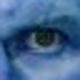

In [ ]:
#PIL permite la edición de imágenes desde Python
#Image provee funciones para cargar imágenes desde archivos
from PIL import Image as im
data = im.fromarray(open_eye[0][0])
data

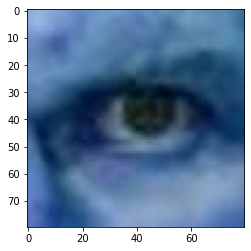

In [ ]:
# Mostrando un ojo abierto
plt.imshow(open_eye[0][0]);

In [ ]:
#Establecemos las variables con la independiente "X" siendo las imágenes, 
#y la dependiente "y" siendo las etiquetas correspondientes (1 para ojo cerrado, 0 para ojo abierto)
X = []
y = []

for features, label in eye:
    X.append(features)
    y.append(label)

In [ ]:
# Los datos deben estar en una forma de arreglo para el modelado por lo tanto las convertimos
X = np.array(X).reshape(-1, 80, 80, 3)
y = np.array(y)

In [ ]:
# Escalamos los datos dividiéndolos por 255.
X = X/255.0

In [ ]:
# Dividir los datos en un conjunto de entrenamiento y un conjunto de validación utilizando train_test_split de scikit learn
# Dividiendo en Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 24)

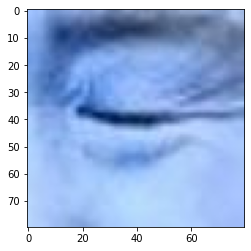

In [ ]:
plt.figure()
plt.imshow(X_train[10])
plt.show()

In [ ]:
# Nombres de la clasificación binaria
class_names = ['open', 'close']

### **5. Diez imágenes del Training Set**

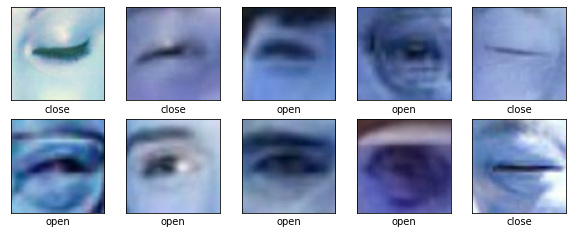

In [ ]:
# Código que genera diez imagenes del dataset de entrenamiento con su etiqueta correspondiente
plt.figure(figsize = (10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[y_train[i]],)

In [ ]:
# Reajustamos cada imagen para que sea 80x80x3 en el caso que la parte superior de la imagen no sea redimensionado  
X_train = X_train.reshape(X_train.shape[0], 80, 80, 3)
X_test = X_test.reshape(X_test.shape[0], 80, 80, 3)

### **6. Modelo Final para exportar**



En esta sección se hicieron varias pruebas cambiando parámetros, añadiendo/quitando capas, entre otros aspectos con la finalidad de obtener las mejores métricas posibles.

A continuación se describirán conceptos y parámetros definidos para el modelo con CNNs:


- **Capa de entrada `tf.keras.layers.Conv2D`**: Esta vez, vamos a definir una capa convolucional en lugar de la capa Flatten, la cual estaba orientada a convertir las imágenes a vectores. Los parámetros de esta capa son: 
  - `32`: El número de convoluciones que desea aplicar: Puramente arbitrario, pero se nos recomienda aplicar con valores iguales a potencias de dos, por ejemplo 32, 64, 128. 
  - `(3,3)`: El tamaño de la convolución, en este caso usaremos kernels de 3x3. 
  - `activation='relu'`: La función de activación a utilizar. En este caso usaremos relu que es el equivalente a devolver x cuando x> 0, de lo contrario devolver 0. 
  - `input_shape=(80, 80, 3)`: las dimensiones de las imágenes de entrada.

- **Capa intermedias `tf.keras.layers.Conv2D` y `tf.keras.layers.MaxPooling2D`**: En el caso de las capas convolucionales intermedias, estan deberán ser definidas a nuestro criterio. Un práctica comun en CNNs es aplicar una capa MaxPooling después de aplicar una capa convolucional. Esto debido a que las capas del tipo pooling ayudan a reducir el tamaño de las imágenes y mantener las características mas importantes. Al especificar (2,2) para el MaxPooling, el imagen resultante sera del tamaño de un cuarto del tamaño anterior de la imagen entrante.

- **Clasificador `tf.keras.layers.Flatten` y `tf.keras.layers.Dense`**: Todas las anteriores capas forman parte de un componente denominado extractor de características y su finalidad es extraer características visuales que permitan distinguir rasgos comunes en las imágenes de un dataset. La ultima capa generalmente genera un tensor extenso que debera ser aplanado para servir de entrada a las siguientes capas del modelo. Debido a esto, aplicar Flatten es un procedimiento comun en este punto. A las siguientes capas Dense se las conoce como clasificador y tienen la finalidad de detectar la categoría correspondiente a la imagen. La última capa le estamos asignando la función de activación sigmoid.


In [ ]:
#Instanciamiento del Modelo
model = Sequential()

# Agregando primera capa de convolución 2D
model.add(Conv2D(
                filters = 32, # Número de convoluciones (filtros)
                kernel_size = (3,3), # Tamaño del kernel
                activation = 'relu', # Función de activación, en nuestro caso estamos usando ReLu
                input_shape = (80,80,3) # Dimensiones de la imagen
))

# Agregando pooling despues de capa de convolucion 2D
model.add(MaxPooling2D(pool_size = (2,2))) # Dimensiones de la región que se esta agregando Pooling
#
# Agregar otra capa convolucional
model.add(Conv2D(
                filters = 32, # Número de filtros
                kernel_size = (3,3),# Filtro de alto/ancho
                activation = 'relu'# Función de activación 
))
#
# Agregar otra capa de Pooling
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Adicionando primera capa Dense con 256 nodos
model.add(Dense(256, activation='relu'))

# Adicionando una capa de dropout para evitar sobreentrenamiento
model.add(Dropout(0.4))

# Adicionando una capa Dense
model.add(Dense(512, activation='relu'))

# Adicionando una capa de Dropout para evitar sobreentrenamiento
model.add(Dropout(0.4)) 

model.add(Dense(1024, activation='relu'))

# Adicionando una capa de Dropout para evitar sobreentrenamiento
model.add(Dropout(0.4))


model.add(Dense(1, activation = 'sigmoid'))
  
model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=[tf.keras.metrics.AUC(curve = 'PR')])

#Entrenamos el modelo
history = model.fit(X_train,
            y_train,
            batch_size=800,
            validation_data=(X_test, y_test),
            epochs=30)

Epoch 1/30
14/14 [==============================] - 5s 206ms/step - loss: 0.5764 - auc_2: 0.4179 - val_loss: 0.4792 - val_auc_2: 0.7675
Epoch 2/30
14/14 [==============================] - 2s 132ms/step - loss: 0.4039 - auc_2: 0.7850 - val_loss: 0.4941 - val_auc_2: 0.8315
Epoch 3/30
14/14 [==============================] - 2s 132ms/step - loss: 0.3234 - auc_2: 0.8451 - val_loss: 0.2581 - val_auc_2: 0.9121
Epoch 4/30
14/14 [==============================] - 2s 132ms/step - loss: 0.2421 - auc_2: 0.9059 - val_loss: 0.2018 - val_auc_2: 0.9577
Epoch 5/30
14/14 [==============================] - 2s 132ms/step - loss: 0.1732 - auc_2: 0.9501 - val_loss: 0.1470 - val_auc_2: 0.9683
Epoch 6/30
14/14 [==============================] - 2s 132ms/step - loss: 0.1435 - auc_2: 0.9656 - val_loss: 0.1647 - val_auc_2: 0.9725
Epoch 7/30
14/14 [==============================] - 2s 134ms/step - loss: 0.1321 - auc_2: 0.9703 - val_loss: 0.1281 - val_auc_2: 0.9753
Epoch 8/30
14/14 [==============================


Finalmente, al llamar a `model.summary()` podemos ver el tamaño y la forma de la red, y notará que después de cada capa MaxPooling, el tamaño de la imagen se tiende a reducirse.

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 78, 78, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 10368)             0         
                                                                 
 dense_8 (Dense)             (None, 256)              

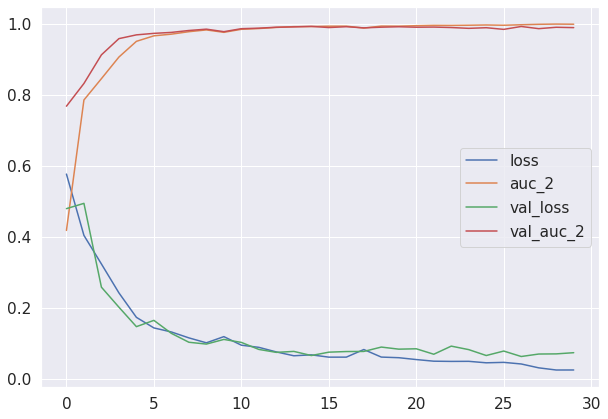

In [ ]:
#Visualizamos los datos históricos de las pérdidas y la precisión durante el entrenamiento. 
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 7))

In [ ]:
# Evaluamos modelo en datos de prueba
score = model.evaluate(X_test,
                       y_test,
                       verbose=1)

labels = model.metrics_names

# Mostrar rendimiento del modelo
print(f'{labels[0]}: {score[0]}')
print(f'{labels[1]}: {score[1]}')

109/109 [==============================] - 1s 5ms/step - loss: 0.0737 - auc_2: 0.9887
loss: 0.07373342663049698
auc_2: 0.9886708855628967


In [ ]:
#Hacemos la predicción
preds = model.predict(X_test)
preds.round(1)
preds

array([[9.0859115e-01],
       [6.0881846e-09],
       [1.9494792e-06],
       ...,
       [9.9983311e-01],
       [1.5420155e-11],
       [4.6336771e-07]], dtype=float32)

In [ ]:
# Mostrando la matriz de confusión
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=preds.round()).numpy()

confusion_matrix

array([[2479,   21],
       [  56,  922]], dtype=int32)

En el campo de la inteligencia artificial  y el aprendizaje automático una **matriz de confusión** es una herramienta que permite visualizar el desempeño de un algoritmo  de aprendizaje supervisado. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real., o sea en términos prácticos nos permite ver  qué tipos de aciertos y errores está teniendo nuestro modelo a la hora de pasar por el proceso de aprendizaje con los datos.

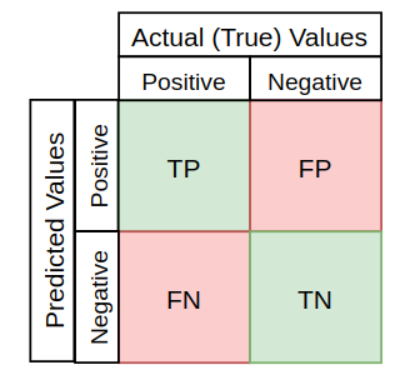

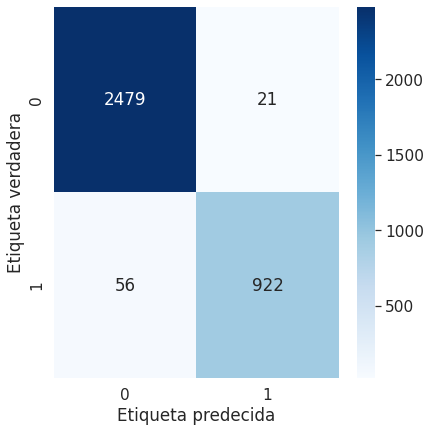

In [ ]:
# Ploteamos la matriz de confusión
import seaborn as sns

figure = plt.figure(figsize=(6,6))

sns.set(font_scale=1.4)
plt.cm.Dark2_r
sns.heatmap(confusion_matrix, annot=True, cmap=plt.cm.Blues, fmt='g')

plt.tight_layout()
plt.ylabel('Etiqueta verdadera')
plt.xlabel('Etiqueta predecida')
plt.show()

**True positive (TP) -** Son los valores positivos correctamente predichos, lo que significa que el valor de la clase real es positivo y el valor de la clase predicha también es positivo.

**True negative (TN) -** Son los valores negativos predichos correctamente, lo que significa que el valor de la clase real es no y el valor de la clase predicha también es no. 

Falsos positivos y falsos negativos, estos valores se producen cuando su clase real se contradice con la clase predicha.

**False positive (FP) -** Cuando la clase real es no y la clase predicha es sí. 

**False negative (FN) -** cuando la clase real es positiva pero la clase prevista es negativa. 



In [ ]:
tn, fp, fn, tp = confusion_matrix.ravel()

**Accuracy:**
La métrica base utilizada para la evaluación del modelo suele ser la Exactitud, que describe el número de predicciones correctas sobre todas las predicciones.

**Precision:** La precisión es una medida de cuántas de las predicciones positivas realizadas son correctas (verdaderos positivos).

**Recall/sensitivity:** El recall es una medida del número de casos positivos que el clasificador predijo correctamente, sobre todos los casos positivos de los datos. A veces también se denomina sensibilidad.

**Specificity:** La especificidad es una medida de cuántas predicciones negativas realizadas son correctas (verdaderos negativos). 

**F1-Score:** La puntuación F1 es una medida que combina la precisión y el recall. Suele describirse como la media armónica de ambas. La media armónica no es más que otra forma de calcular una "media" de valores, generalmente descrita como más adecuada para los ratios (como la precisión y el recall) que la media aritmética tradicional.

In [ ]:
#Ahora, teniendo los valores de la matriz de confusión, calcularemos las respectivas 
#métricas de acuerdo a su fórmula

# Accuracy
accuracy = (tn + tp) / (tn + fp + fn + tp)
print(f'Accuracy: {accuracy}')

# Precision
precision = tp / (tp + fp)
print(f'Precision: {precision}')

# Sensitivity
sensitivity = tp / (tp + fn)
print(f'Sensitivity / recall: {sensitivity}')

# Specificity
specificty = tn / (tn + fp)
print(f'Specificity: {specificty}')

# F1 score
f1_score = 2 * precision * sensitivity / (precision + sensitivity)
print(f'F1_score: {f1_score}')

Accuracy: 0.9778608395629672
Precision: 0.9777306468716861
Sensitivity / recall: 0.9427402862985685
Specificity: 0.9916
F1_score: 0.9599167100468505


In [ ]:
# Exportando el mejor modelo, para su posterior utilización en la parte 3
model.save('/content/sample_data/best_model_2.h5')


## **Comparación de resultados obtenidos**
Tras un largo proceso de pruebas, se obtuvieron varios modelos en el que compararemos sus resultados en base a las modificaciones que se hicieron y a las métricas obtenidas:

### 1. **best_model_1.h5**
El modelo tenía las siguiente características, entrenado en 10 épocas:
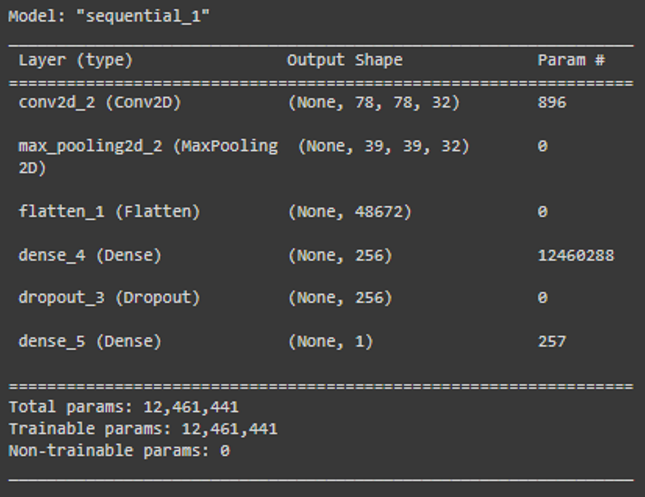

**Métricas**
* specificity: 0.98
* sensitivity: 0.8179959100204499
* accuracy: 0.9344450833812536
* precision: 0.9411764705882353
* f1_score: 0.87527352297593


### 2. **best_model_2.h5**
El modelo tenía las siguientes características, entrenado en 20 épocas:

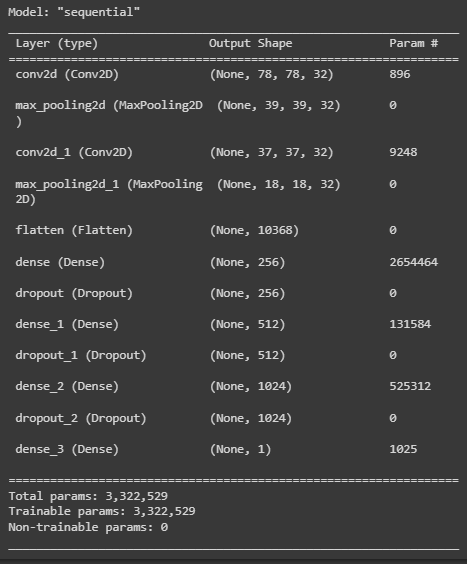
**Métricas**
* specificity: 0.9548
* sensitivity: 0.9897750511247444
* accuracy: 0.964634847613571
* precision: 0.8954671600370028
* f1_score: 0.94026226329458

### 3. **best_model_5.h5** 👑👑👑
El modelo tenía las siguientes características, entrenado en 30 épocas:

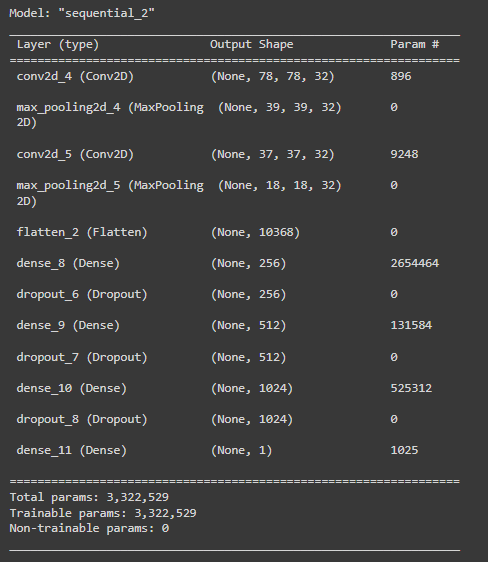

**Métricas**
* specificity: 0.9916
* sensitivity: 0.9427402862985685
* accuracy: 0.9778608395629672
* precision: 0.9777306468716861
* f1_score: 0.9599167100468505

### 4. **best_model_4.h5**
El modelo tenía las siguientes características, entrenado en 25 épocas:

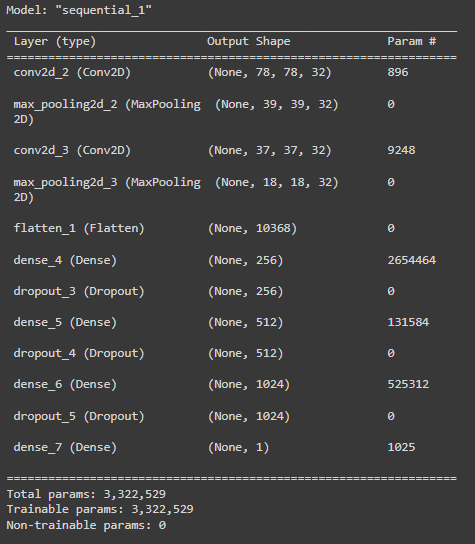


**Métricas**
* specificity: 0.9876
* sensitivity: 0.9171779141104295
* accuracy: 0.9677975848188615
* precision: 0.9665948275862069
* f1_score: 0.9412381951731376






### **Conclusión:** 
Como se puede ver el modelo best_model_5.h5 tiene los mejores resultados, por lo tanto será aplicado a la aplicación con la cámara.